# NC-composites from HRIT-files

2015-03-03T13:00
2015-07-09T09:00
2015-03-26T14:00
2015-01-20T15:00
2015-11-29T16:00
2015-05-11T15:00
2015-01-09T13:00


'lat_min' : 34.
'lat_max' : 58.
'lon_min' : -10.
'lon_max' : 28. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from l15_msevi import msevi as msv
from PIL import Image
import datetime as dt

import MSGtools as mst

from analysis_tools import grid_and_interpolation as gi

import msg_coord_conv2 as mcc

In [2]:
def array_to_256(array):
    return (array*255.999).astype("uint8")

def day_natural_composite(vis006_data,vis008_data,nir016_data,factor=1,gamma=1):
    blue = array_to_256(np.clip(vis006_data/factor,0,1)**(1./gamma))
    green = array_to_256(np.clip(vis008_data/factor,0,1)**(1./gamma))
    red = array_to_256(np.clip(nir016_data/factor,0,1)**(1./gamma))
    
    return np.dstack([red,green,blue]).astype("uint8")

In [3]:
dates = [dt.datetime(2015,3,3,13,0),
         dt.datetime(2015,7,9,9,0),
         dt.datetime(2015,1,20,15,0),
         dt.datetime(2015,11,29,16,0),
         dt.datetime(2015,5,11,15,0),
         dt.datetime(2015,1,9,13,0)]

In [4]:
slon,slat = mst.get_msg_lon_lat('full','pzs')

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [ ]:
cols, rows = mcc.ll2msg_ij(np.array([34,34,58,58]),np.array([-10,28,-10,28]),'pzs','std')

In [59]:
rmin = int(np.rint(np.min(rows)))
rmax = int(np.rint(np.max(rows)))
cmin = int(np.rint(np.min(cols)))
cmax = int(np.rint(np.max(cols)))

In [60]:
rmin,rmax,cmin,cmax

(212, 734, 1559, 2645)

In [66]:
slon_cutout = slon[rmin:rmax,cmin:cmax]
slat_cutout = slat[rmin:rmax,cmin:cmax]

In [62]:
s = msv.MSevi(time=dates[0],region='full',scan_type='pzs',chan_list=["VIS006","VIS008","IR_016"])
s.rad2refl()

... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS006___-000001___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS006___-000002___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS006___-000003___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS006___-000004___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS006___-000005___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS006___-000006___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS006___-000007___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS006___-000008___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS008___-000001___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3________-VIS008___-000002___-201503031300-__
... reading  /tmp/hrit9258939223/H-000-MSG3__-MSG3

In [64]:
nc = day_natural_composite(s.ref['VIS006'][rmin:rmax,cmin:cmax],
                           s.ref['VIS008'][rmin:rmax,cmin:cmax],
                           s.ref['IR_016'][rmin:rmax,cmin:cmax],
                           0.9,2.8)

(-0.5, 1085.5, 521.5, -0.5)

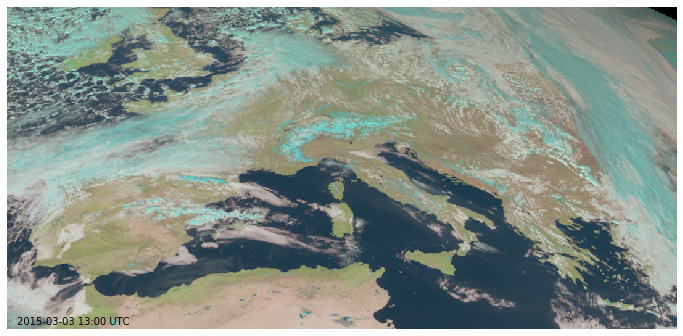

In [73]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.imshow(nc)
ax.text(15,515,dates[0].strftime("%Y-%m-%d %H:%M UTC"))
ax.axis("off")

In [74]:
img = Image.fromarray(nc)

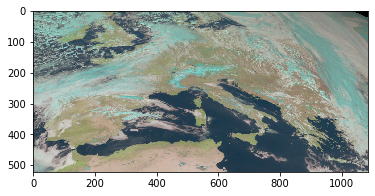

In [75]:
plt.imshow(img)

In [76]:
img.save("/vols/satellite/home/lenk/nc_20150303T1300.jpg")

In [78]:
msv.MSevi?

In [79]:
for date in dates:
    s = msv.MSevi(time=date,region='full',scan_type='pzs',chan_list=["VIS006","VIS008","IR_016"])
    s.rad2refl()
    
    nc = day_natural_composite(s.ref['VIS006'][rmin:rmax,cmin:cmax],
                               s.ref['VIS008'][rmin:rmax,cmin:cmax],
                               s.ref['IR_016'][rmin:rmax,cmin:cmax],
                               0.9,2.8)
    
    img = Image.fromarray(nc)
    
    img.save("/vols/satellite/home/lenk/nc_{}.jpg".format(date.strftime("%Y%m%dT%H%M")))

... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS006___-000001___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS006___-000002___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS006___-000003___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS006___-000004___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS006___-000005___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS006___-000006___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS006___-000007___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS006___-000008___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS008___-000001___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3________-VIS008___-000002___-201503031300-__
... reading  /tmp/hrit8817989817/H-000-MSG3__-MSG3

... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-VIS008___-000007___-201511291600-__
... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-VIS008___-000008___-201511291600-__
... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-IR_016___-000001___-201511291600-__
... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-IR_016___-000002___-201511291600-__
... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-IR_016___-000003___-201511291600-__
... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-IR_016___-000004___-201511291600-__
... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-IR_016___-000005___-201511291600-__
... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-IR_016___-000006___-201511291600-__
... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-IR_016___-000007___-201511291600-__
... reading  /tmp/hrit9760015087/H-000-MSG3__-MSG3________-IR_016___-000008___-201511291600-__

Combine segments

Do calibration
... reading  /tm